# Data Preparation

# 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy import signal
import numpy as np


# 2. Read and clean data

In [2]:
# Left leg
grf_v_left = pd.read_csv(r'..\data\GaitRec\GRF_F_V_RAW_left.csv')
grf_ap_left = pd.read_csv(r'..\data\GaitRec\GRF_F_AP_RAW_left.csv')
grf_ml_left = pd.read_csv(r'..\data\GaitRec\GRF_F_ML_RAW_left.csv')
cop_ap_left = pd.read_csv(r'..\data\GaitRec\GRF_COP_AP_RAW_left.csv')
cop_ml_left = pd.read_csv(r'..\data\GaitRec\GRF_COP_ML_RAW_left.csv')

In [3]:
# Right leg
grf_v_right = pd.read_csv(r'..\data\GaitRec\GRF_F_V_RAW_right.csv')
grf_ap_right = pd.read_csv(r'..\data\GaitRec\GRF_F_AP_RAW_right.csv')
grf_ml_right = pd.read_csv(r'..\data\GaitRec\GRF_F_ML_RAW_right.csv')
cop_ap_right = pd.read_csv(r'..\data\GaitRec\GRF_COP_AP_RAW_right.csv')
cop_ml_right = pd.read_csv(r'..\data\GaitRec\GRF_COP_ML_RAW_right.csv')

In [4]:
# Labelling
participants_label = pd.read_csv(r'..\data\GaitRec\GRF_metadata.csv')

In [5]:
grf_v_left.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,F_V_RAW_1,F_V_RAW_2,F_V_RAW_3,F_V_RAW_4,F_V_RAW_5,F_V_RAW_6,F_V_RAW_7,...,F_V_RAW_410,F_V_RAW_411,F_V_RAW_412,F_V_RAW_413,F_V_RAW_414,F_V_RAW_415,F_V_RAW_416,F_V_RAW_417,F_V_RAW_418,F_V_RAW_419
0,510,413,1,25.007842,44.399398,71.282930,111.350325,151.060614,188.434204,223.103463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,510,413,2,25.019307,62.278721,94.491200,133.914834,176.045690,211.082598,241.765517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,510,413,3,25.021281,51.954258,74.954363,106.561071,141.265769,172.779614,202.292505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,510,413,4,25.024699,57.128230,91.755101,132.413711,178.811880,224.234218,268.680726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,510,413,6,25.020170,63.753965,100.386720,144.404215,190.093214,229.451770,263.502418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
participants_label.head()

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST
0,1,29885,HC,HC,1,18,173.0,516.1,52.6,42.0,NaN,1,0.0,2,0,1,29.01.2015,0,0,1
1,1,29886,HC,HC,1,18,173.0,516.2,52.6,42.0,NaN,1,0.0,1,0,1,29.01.2015,0,0,1
2,1,29888,HC,HC,1,18,173.0,516.1,52.6,42.0,NaN,1,0.0,3,0,1,29.01.2015,0,0,1
3,2,888812549,HC,HC,1,51,182.0,752.1,76.7,44.0,NaN,1,0.0,1,0,1,03.08.2017,1,0,0
4,2,888812550,HC,HC,1,51,182.0,752.4,76.7,44.0,NaN,1,0.0,3,0,1,03.08.2017,1,0,0


## 2.1 Empty Data

In [7]:
%who DataFrame

cop_ap_left	 cop_ap_right	 cop_ml_left	 cop_ml_right	 grf_ap_left	 grf_ap_right	 grf_ml_left	 grf_ml_right	 grf_v_left	 
grf_v_right	 participants_label	 


In [8]:
%who_ls DataFrame

['cop_ap_left',
 'cop_ap_right',
 'cop_ml_left',
 'cop_ml_right',
 'grf_ap_left',
 'grf_ap_right',
 'grf_ml_left',
 'grf_ml_right',
 'grf_v_left',
 'grf_v_right',
 'participants_label']

In [9]:
# count of data
for i in [cop_ap_left,cop_ap_right,cop_ml_left,cop_ml_right,grf_ap_left,grf_ap_right,grf_ml_left,grf_ml_right,grf_v_left,grf_v_right,participants_label]:
    print(i.shape)

(75732, 422)
(75732, 408)
(75732, 422)
(75732, 408)
(75732, 422)
(75732, 408)
(75732, 422)
(75732, 408)
(75732, 422)
(75732, 408)
(8971, 20)


In [10]:
## Empty data
cop_ap_left.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

COP_AP_RAW_419    75731
COP_AP_RAW_418    75731
COP_AP_RAW_417    75731
COP_AP_RAW_416    75731
COP_AP_RAW_415    75731
                  ...  
COP_AP_RAW_95         3
COP_AP_RAW_97         3
COP_AP_RAW_94         2
COP_AP_RAW_93         2
COP_AP_RAW_92         2
Length: 328, dtype: int64

In [11]:
participants_label.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

SHOE_SIZE            3294
HEIGHT               3251
AFFECTED_SIDE         810
ORTHOPEDIC_INSOLE     658
dtype: int64

In [12]:
cop_ap_left.apply(lambda x: x.count(), axis=1)

0        198
1        196
2        195
3        196
4        194
        ... 
75727    126
75728    132
75729    139
75730    131
75731    132
Length: 75732, dtype: int64

In [13]:
df = pd.DataFrame([], columns = ['cop_ap_left',
 'cop_ap_right',
 'cop_ml_left',
 'cop_ml_right',
 'grf_ap_left',
 'grf_ap_right',
 'grf_ml_left',
 'grf_ml_right',
 'grf_v_left',
 'grf_v_right'])
df.columns

Index(['cop_ap_left', 'cop_ap_right', 'cop_ml_left', 'cop_ml_right',
       'grf_ap_left', 'grf_ap_right', 'grf_ml_left', 'grf_ml_right',
       'grf_v_left', 'grf_v_right'],
      dtype='object')

In [14]:
count = 0
for i in [cop_ap_left,cop_ap_right,cop_ml_left,cop_ml_right,grf_ap_left,grf_ap_right,grf_ml_left,grf_ml_right,grf_v_left,grf_v_right]:
    df[df.columns[count]]=i.apply(lambda x: x.count(), axis=1)
    count+=1
df

,cop_ap_left,cop_ap_right,cop_ml_left,cop_ml_right,grf_ap_left,grf_ap_right,grf_ml_left,grf_ml_right,grf_v_left,grf_v_right
0,198,196,198,196,198,196,198,196,198,196
1,196,202,196,202,196,202,196,202,196,202
2,195,202,195,202,195,202,195,202,195,202
3,196,192,196,192,196,192,196,192,196,192
4,194,185,194,185,194,185,194,185,194,185
...,...,...,...,...,...,...,...,...,...,...
75727,126,133,126,133,126,133,126,133,126,133
75728,132,132,132,132,132,132,132,132,132,132
75729,139,134,139,134,139,134,139,134,139,134
75730,131,133,131,133,131,133,131,133,131,133


In [15]:
# export dataframe to csv
df.to_csv('../data/data_non_zeroes.csv', index=True)

## 2.2 Check left data matches right data

In [16]:
left = ['cop_ap_left','cop_ml_left','grf_ap_left','grf_ml_left','grf_v_left']
right = ['cop_ap_right','cop_ml_right','grf_ap_right','grf_ml_right','grf_v_right']

In [17]:
# First column
df[left].iloc[:, 0]

0        198
1        196
2        195
3        196
4        194
        ... 
75727    126
75728    132
75729    139
75730    131
75731    132
Name: cop_ap_left, Length: 75732, dtype: int64

In [18]:
# First column
df[right].iloc[:, 0]

0        196
1        202
2        202
3        192
4        185
        ... 
75727    133
75728    132
75729    134
75730    133
75731    129
Name: cop_ap_right, Length: 75732, dtype: int64

In [19]:
%%time
# Does all the left columns match?
# Does all the right columns match?
# 3830 records have same left and right columns, even though they are usually different

print(df[left].eq(df[left].iloc[:, 0], axis=0).all(1).loc[lambda x : x==False])
print(df[right].eq(df[right].iloc[:, 0], axis=0).all(1).loc[lambda x : x==False])
print(df[left].eq(df[right].iloc[:, 0], axis=0).all(1).loc[lambda x : x==True])

Series([], dtype: bool)
Series([], dtype: bool)
27       True
69       True
111      True
112      True
118      True
         ... 
75684    True
75689    True
75691    True
75700    True
75728    True
Length: 3830, dtype: bool
CPU times: total: 0 ns
Wall time: 41.9 ms


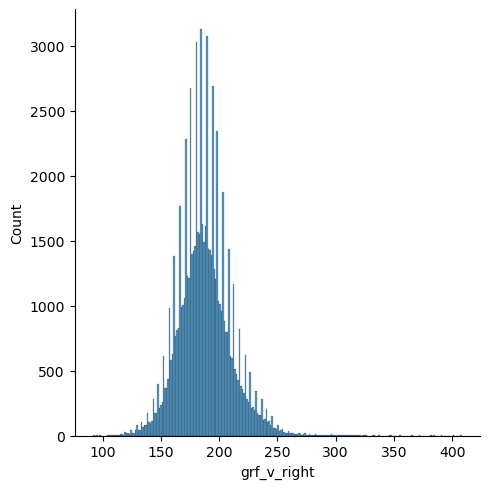

In [20]:
# Most of the data have about 200 readings per trial
sns.displot(df['grf_v_right'])
plt.show()

# 3. Preliminary Data Analysis
1. Normalise readings with 100% stride
2. Normalise GRF with Body weight, Merge on Subject ID
3. Normalise COP with stride length, Merge on Subject ID (Females: Height in inches multiplied by 0.413 equals stride length. Males: Height in inches multiplied by 0.415 equals stride length.)

<br>
According to the University of Iowa, the average person’s walking step length is 2.5 feet (30 inches), so the average stride length would be approximately 5 feet (60 inches).
There are a number of factors that can impact stride length including: 
<br>

* height
* age
* injury
* illness
* terrain

cop_ap_left,cop_ap_right,cop_ml_left,cop_ml_right,grf_ap_left,grf_ap_right,grf_ml_left,grf_ml_right,grf_v_left,grf_v_right,participants_label

In [21]:
participants_label.loc[(participants_label.SUBJECT_ID == 510) , participants_label.columns[0:]]

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST
2022,510,16179,C,C_F,1,51,178.0,1160.1,118.3,44.0,2.0,1,NaN,2,1,3,06.04.2011,1,0,0
2023,510,16257,C,C_F,1,51,178.0,1151.9,117.4,44.0,2.0,2,0.0,2,1,2,13.04.2011,1,0,0
2024,510,16330,C,C_F,1,51,178.0,1147.8,117.0,44.0,2.0,2,0.0,2,1,2,20.04.2011,1,0,0
2025,510,16377,C,C_F,1,51,178.0,1171.5,119.4,44.0,2.0,2,0.0,2,1,2,27.04.2011,1,0,0
2026,510,413,C,C_F,1,47,178.0,1104.9,112.6,44.0,2.0,1,NaN,2,0,1,26.01.2007,1,0,0
2027,510,29354,C,C_F,1,55,178.0,1117.0,113.9,44.0,2.0,1,0.0,2,2,3,05.12.2014,1,0,0


In [22]:
participants_label.loc[(participants_label.SUBJECT_ID == 210) , participants_label.columns[0:]]

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST
804,210,30206,HC,HC,0,23,169.0,565.1,57.6,39.0,NaN,1,0.0,2,0,1,24.02.2015,0,0,1
805,210,30207,HC,HC,0,23,169.0,565.1,57.6,39.0,NaN,1,0.0,1,0,1,24.02.2015,0,0,1
806,210,30208,HC,HC,0,23,169.0,565.1,57.6,39.0,NaN,1,0.0,3,0,1,24.02.2015,0,0,1


In [23]:
s1 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30207) , grf_v_right.columns[3:]]
s3 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30206) , grf_v_right.columns[3:]]
s2 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30208) , grf_v_right.columns[3:]]
s1

,F_V_RAW_1,F_V_RAW_2,F_V_RAW_3,F_V_RAW_4,F_V_RAW_5,F_V_RAW_6,F_V_RAW_7,F_V_RAW_8,F_V_RAW_9,F_V_RAW_10,...,F_V_RAW_396,F_V_RAW_397,F_V_RAW_398,F_V_RAW_399,F_V_RAW_400,F_V_RAW_401,F_V_RAW_402,F_V_RAW_403,F_V_RAW_404,F_V_RAW_405
57943,25.012249,40.115992,57.042282,75.732911,91.943673,102.212429,110.004006,113.585690,114.900691,116.364253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57944,25.001285,41.007954,60.773154,85.212451,106.279526,119.207605,124.332816,125.646202,124.182870,123.354598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57945,25.016808,41.878866,58.826112,80.011666,96.810290,110.883644,117.701563,118.291242,118.996613,118.423919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57946,25.005174,37.223470,53.789879,73.087649,90.155579,101.824566,107.632234,107.948998,106.727984,105.227936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57947,25.001077,42.212000,60.674148,81.019720,101.768943,117.191208,126.135285,130.298466,130.851105,132.161278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57948,25.002937,39.166009,59.289719,77.237558,91.317297,100.129905,104.766203,105.616679,103.668764,102.618969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57949,25.005635,39.065946,59.861936,81.635632,102.155599,117.581216,125.488282,127.721688,126.479866,124.929386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57950,25.008999,36.673399,55.187005,78.381822,100.025325,116.517981,126.427827,133.245701,135.125868,137.851762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57951,25.000328,39.260734,56.775743,74.424103,88.467318,97.547260,103.984945,107.321842,109.292249,112.362512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57952,25.003249,40.351910,61.628460,82.360991,101.075657,113.571012,118.925791,120.111603,120.323835,121.490007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


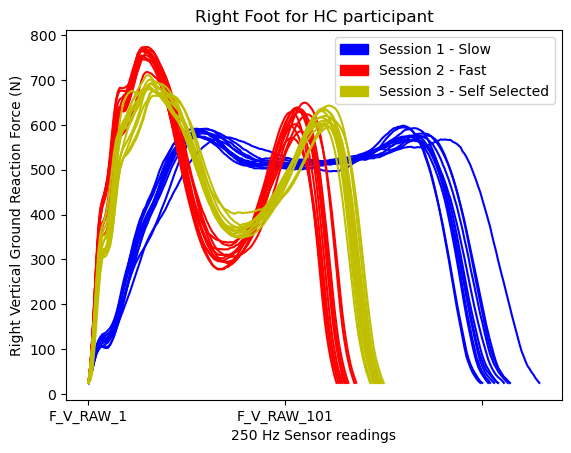

In [24]:
# Vertical GRF of 1 right foot strike
for i in range(0,len(s1)):
    s1.iloc[i].dropna().plot(color='b')
    session1 = mpatches.Patch(color='b', label='Session 1 - Slow')
for i in range(0,len(s2)):
    s2.iloc[i].dropna().plot(color='r')
    session2 = mpatches.Patch(color='r', label='Session 2 - Fast')
for i in range(0,len(s3)):
    s3.iloc[i].dropna().plot(color='y')
    session3 = mpatches.Patch(color='y', label='Session 3 - Self Selected')
plt.legend(loc="upper right",handles=[session1, session2, session3])
plt.title('Right Foot for HC participant')
plt.xlabel('250 Hz Sensor readings')
plt.locator_params(axis="x", nbins=5)
plt.ylabel('Right Vertical Ground Reaction Force (N)')
plt.show()

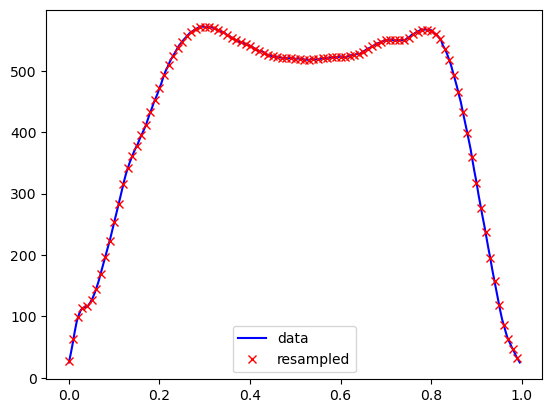

In [25]:
# down sample
x = np.linspace(0, 1, 230, endpoint=False)
y = s1.iloc[0].dropna()
f = signal.resample(y, 100)
xnew = np.linspace(0, 1, 100, endpoint=False)
plt.plot(x, y, 'b-', xnew, f, 'rx')
plt.legend(['data', 'resampled'], loc='best')
plt.show()

In [26]:
s1

,F_V_RAW_1,F_V_RAW_2,F_V_RAW_3,F_V_RAW_4,F_V_RAW_5,F_V_RAW_6,F_V_RAW_7,F_V_RAW_8,F_V_RAW_9,F_V_RAW_10,...,F_V_RAW_396,F_V_RAW_397,F_V_RAW_398,F_V_RAW_399,F_V_RAW_400,F_V_RAW_401,F_V_RAW_402,F_V_RAW_403,F_V_RAW_404,F_V_RAW_405
57943,25.012249,40.115992,57.042282,75.732911,91.943673,102.212429,110.004006,113.585690,114.900691,116.364253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57944,25.001285,41.007954,60.773154,85.212451,106.279526,119.207605,124.332816,125.646202,124.182870,123.354598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57945,25.016808,41.878866,58.826112,80.011666,96.810290,110.883644,117.701563,118.291242,118.996613,118.423919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57946,25.005174,37.223470,53.789879,73.087649,90.155579,101.824566,107.632234,107.948998,106.727984,105.227936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57947,25.001077,42.212000,60.674148,81.019720,101.768943,117.191208,126.135285,130.298466,130.851105,132.161278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57948,25.002937,39.166009,59.289719,77.237558,91.317297,100.129905,104.766203,105.616679,103.668764,102.618969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57949,25.005635,39.065946,59.861936,81.635632,102.155599,117.581216,125.488282,127.721688,126.479866,124.929386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57950,25.008999,36.673399,55.187005,78.381822,100.025325,116.517981,126.427827,133.245701,135.125868,137.851762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57951,25.000328,39.260734,56.775743,74.424103,88.467318,97.547260,103.984945,107.321842,109.292249,112.362512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57952,25.003249,40.351910,61.628460,82.360991,101.075657,113.571012,118.925791,120.111603,120.323835,121.490007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def resample_trials(row):
    old = row.dropna()
    new = signal.resample(old, 100)
    return new

## Next steps
1. Apply resampling to all 10 dataframes
2. Merge with labels and add features -> time taken for each trial
3. Normalise GRF by body weight
4. Normalise COP by stride
5. Save into csv files
cop_ap_left,

cop_ap_right,cop_ml_left,cop_ml_right,grf_ap_left,grf_ap_right,grf_ml_left,grf_ml_right,grf_v_left,grf_v_right,participants_label

In [28]:
demo = cop_ap_right.head(10)
demo

,SUBJECT_ID,SESSION_ID,TRIAL_ID,COP_AP_RAW_1,COP_AP_RAW_2,COP_AP_RAW_3,COP_AP_RAW_4,COP_AP_RAW_5,COP_AP_RAW_6,COP_AP_RAW_7,...,COP_AP_RAW_396,COP_AP_RAW_397,COP_AP_RAW_398,COP_AP_RAW_399,COP_AP_RAW_400,COP_AP_RAW_401,COP_AP_RAW_402,COP_AP_RAW_403,COP_AP_RAW_404,COP_AP_RAW_405
0,510,413,1,-0.162955,-0.154802,-0.157569,-0.156323,-0.153143,-0.149204,-0.147165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,510,413,2,-0.132743,-0.143059,-0.146384,-0.143090,-0.140517,-0.138094,-0.135666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,510,413,3,-0.204854,-0.207629,-0.215930,-0.211435,-0.207549,-0.206310,-0.204622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,510,413,4,-0.225304,-0.203526,-0.203677,-0.200858,-0.201696,-0.202704,-0.200028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,510,413,6,-0.149431,-0.134684,-0.134163,-0.133411,-0.131665,-0.127982,-0.125324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,510,413,7,-0.150026,-0.146313,-0.149047,-0.147456,-0.143798,-0.139303,-0.136541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,510,413,8,-0.148345,-0.157013,-0.159150,-0.156872,-0.155585,-0.151475,-0.148689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,510,413,9,-0.119980,-0.133449,-0.130273,-0.125256,-0.122891,-0.120774,-0.118077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,510,413,10,-0.146614,-0.160996,-0.163143,-0.161064,-0.158882,-0.156332,-0.152467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1140,542,2,-0.140515,-0.132021,-0.133181,-0.139083,-0.137961,-0.136450,-0.134406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
resample_trials(demo.iloc[0][3:])

array([-8.40748743e-02, -1.77207571e-01, -1.42869009e-01, -1.54371707e-01,
       -1.38035206e-01, -1.42663135e-01, -1.31272431e-01, -1.33918715e-01,
       -1.26522115e-01, -1.27388116e-01, -1.21904045e-01, -1.22241405e-01,
       -1.17541182e-01, -1.17436837e-01, -1.12686442e-01, -1.11930266e-01,
       -1.08187296e-01, -1.06849434e-01, -1.03589393e-01, -1.01590692e-01,
       -9.68992544e-02, -9.42765825e-02, -9.20142292e-02, -8.94116947e-02,
       -8.76001370e-02, -8.58226407e-02, -8.46032767e-02, -8.30581755e-02,
       -8.22442763e-02, -8.07892371e-02, -8.04225936e-02, -7.90512031e-02,
       -7.89491132e-02, -7.74879183e-02, -7.75050658e-02, -7.61014746e-02,
       -7.61724545e-02, -7.44161322e-02, -7.47585466e-02, -7.26865924e-02,
       -7.28732874e-02, -7.04984556e-02, -7.04842825e-02, -6.82197774e-02,
       -6.82587163e-02, -6.57492921e-02, -6.60636734e-02, -6.32474692e-02,
       -6.35899936e-02, -6.11855044e-02, -6.18338445e-02, -5.94243065e-02,
       -6.03312650e-02, -

In [30]:
%%time
pro = demo.apply(lambda x: resample_trials(x[3:]), axis=1)
pro

CPU times: total: 0 ns
Wall time: 8.99 ms


0    [-0.08407487429716237, -0.17720757121867659, -...
1    [-0.05989867987664035, -0.16605822609625648, -...
2    [-0.13053813348594984, -0.2332676954327712, -0...
3    [-0.15574971587463718, -0.21900857750247063, -...
4    [-0.07832484852933687, -0.15207349855813684, -...
5    [-0.07681442683742476, -0.16836415826407636, -...
6    [-0.08406945170233247, -0.17703635654346428, -...
7    [-0.06036485413516336, -0.14952784579080478, -...
8    [-0.0871274254286014, -0.180435897345104, -0.1...
9    [-0.06662299249642636, -0.15257087349562726, -...
dtype: object

In [31]:
%%time
cop_ap_left_pro  = pd.concat([cop_ap_left[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(cop_ap_left.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
cop_ap_right_pro = pd.concat([cop_ap_right[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(cop_ap_right.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
cop_ml_left_pro  = pd.concat([cop_ml_left[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(cop_ml_left.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
cop_ml_right_pro = pd.concat([cop_ml_right[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(cop_ml_right.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
grf_ap_left_pro  = pd.concat([grf_ap_left[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(grf_ap_left.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
grf_ap_right_pro = pd.concat([grf_ap_right[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(grf_ap_right.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
grf_ml_left_pro  = pd.concat([grf_ml_left[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(grf_ml_left.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
grf_ml_right_pro = pd.concat([grf_ml_right[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(grf_ml_right.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
grf_v_left_pro   = pd.concat([grf_v_left[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(grf_v_left.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)
grf_v_right_pro  = pd.concat([grf_v_right[['SUBJECT_ID','SESSION_ID','TRIAL_ID']],pd.DataFrame(grf_v_right.apply(lambda x: resample_trials(x[3:]), axis=1).tolist())], axis=1)

CPU times: total: 3min 25s
Wall time: 3min 29s


In [32]:
grf_v_right_pro.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,510,413,1,31.071726,114.495847,195.967700,235.578207,270.597918,339.625254,436.150111,...,393.812839,336.777394,279.659643,227.458575,183.975072,147.080001,111.720536,79.096833,53.201389,30.706006
1,510,413,2,30.141182,101.553607,173.270700,208.403779,242.981303,303.980638,383.394218,...,380.047981,326.069159,273.633173,223.767725,181.781359,146.036350,112.306680,81.537584,55.687638,31.438986
2,510,413,3,29.007648,101.596150,189.974615,229.970630,262.676160,320.144113,394.273533,...,402.417829,343.729973,287.053662,231.560768,184.264650,146.388461,112.665420,81.329716,54.761713,31.754766
3,510,413,4,28.980951,100.996796,197.742664,267.557922,322.364216,398.246140,496.855161,...,356.257063,295.612156,239.019770,186.960032,144.827717,115.725071,87.774354,62.824270,41.290448,28.107522
4,510,413,6,30.686851,113.854304,202.096194,247.084961,281.385118,340.799092,424.115377,...,346.540168,292.394323,241.021201,197.554054,163.073862,128.779527,96.004518,66.206111,43.794051,27.940757


In [33]:
p1 = grf_v_right_pro.loc[(grf_v_right_pro.SUBJECT_ID == 210) & (grf_v_right_pro.SESSION_ID == 30207) , grf_v_right_pro.columns[3:]]
p3 = grf_v_right_pro.loc[(grf_v_right_pro.SUBJECT_ID == 210) & (grf_v_right_pro.SESSION_ID == 30206) , grf_v_right_pro.columns[3:]]
p2 = grf_v_right_pro.loc[(grf_v_right_pro.SUBJECT_ID == 210) & (grf_v_right_pro.SESSION_ID == 30208) , grf_v_right_pro.columns[3:]]
p1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
57943,27.005260,62.864189,98.854620,113.161584,116.610328,126.174804,144.554293,168.715488,196.272889,223.074356,...,317.446667,275.897493,236.835542,195.820463,157.065068,118.703558,85.875609,62.793776,47.027764,31.567395
57944,26.573925,62.217037,107.315682,125.031986,123.888116,127.119255,146.477083,179.852262,221.854753,261.244121,...,379.126786,333.147659,282.962688,229.959946,178.439855,132.750782,92.302625,61.409323,44.058097,30.208725
57945,27.189671,61.292280,100.131440,118.352946,118.142501,123.300222,142.133165,175.941151,217.264708,260.591969,...,331.139847,282.628730,233.272574,188.627244,148.121656,109.415320,77.893129,57.414019,42.513304,29.389273
57946,26.110253,56.745428,94.240825,108.347156,105.475853,109.594546,128.320879,159.898431,199.054774,233.903131,...,333.851736,289.020386,244.135448,197.562088,153.543919,114.611356,80.378513,54.478178,40.256767,30.272878
57947,27.513690,63.347089,106.407986,128.512196,131.427494,137.974149,155.349636,186.091126,223.603923,258.931629,...,312.486556,266.375425,221.573108,177.701674,137.857879,99.051486,72.419885,53.942439,41.331429,29.323360
57948,26.685841,61.345125,94.774405,105.295860,102.884333,107.484276,128.608314,157.291527,192.615067,230.934581,...,326.748580,278.127750,230.028642,183.747155,136.660632,99.808811,72.936913,54.950581,39.932207,28.560561
57949,26.254989,59.498574,102.675835,125.739042,126.326933,126.070704,137.862071,162.883934,201.173758,244.084643,...,355.718508,307.689356,257.358782,207.090711,161.097398,116.354256,79.561989,57.120003,41.502359,28.695274
57950,25.700054,56.888044,102.619641,128.418381,136.206167,143.564172,159.171887,185.307313,219.189121,251.857476,...,345.890421,300.685651,253.187587,203.781589,157.487959,114.460140,77.510513,54.216223,39.795559,29.602422
57951,26.805940,58.174051,90.536411,104.797917,110.394121,118.371112,135.754424,160.540039,190.520043,225.508143,...,311.884533,263.279523,213.619805,168.921422,126.875077,90.998342,65.564244,49.353338,38.594386,27.768527
57952,26.442107,60.984245,101.114859,119.023568,120.238016,124.231950,137.918065,163.869643,196.460634,234.421218,...,371.746452,323.663635,273.298074,220.899953,171.932312,125.416792,83.653969,58.725760,41.395752,28.979459


In [71]:
q1 = cop_ap_left_pro.loc[(cop_ap_left_pro.SUBJECT_ID == 210) & (cop_ap_left_pro.SESSION_ID == 30207) , cop_ap_left_pro.columns[3:]]
q3 = cop_ap_left_pro.loc[(cop_ap_left_pro.SUBJECT_ID == 210) & (cop_ap_left_pro.SESSION_ID == 30206) , cop_ap_left_pro.columns[3:]]
q2 = cop_ap_left_pro.loc[(cop_ap_left_pro.SUBJECT_ID == 210) & (cop_ap_left_pro.SESSION_ID == 30208) , cop_ap_left_pro.columns[3:]]
q1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
57943,-0.150528,-0.241140,-0.204028,-0.215981,-0.199547,-0.205119,-0.193948,-0.197480,-0.188051,-0.186182,...,-0.014642,-0.005020,-0.008230,0.002383,-0.003890,0.011079,0.005928,0.029787,0.016161,0.059448
57944,-0.156190,-0.242653,-0.208316,-0.218573,-0.200508,-0.204940,-0.194173,-0.190864,-0.180157,-0.179043,...,0.002321,0.009584,0.005501,0.016301,0.012044,0.025179,0.018310,0.033096,0.020339,0.059251
57945,-0.130419,-0.212437,-0.179306,-0.191846,-0.174006,-0.178949,-0.166556,-0.167460,-0.156824,-0.154913,...,0.022209,0.031525,0.027697,0.036973,0.033707,0.047772,0.043078,0.061280,0.048674,0.085293
57946,-0.174192,-0.258930,-0.227309,-0.239173,-0.222294,-0.226599,-0.215942,-0.215857,-0.206124,-0.203379,...,-0.044266,-0.035757,-0.038646,-0.028853,-0.032636,-0.019685,-0.023333,0.000539,-0.007130,0.029874
57947,-0.160465,-0.247475,-0.211416,-0.222599,-0.201569,-0.210123,-0.197477,-0.199658,-0.189342,-0.188446,...,-0.012154,-0.002761,-0.007937,0.003289,-0.002590,0.016603,0.010999,0.032793,0.023293,0.067975
57948,-0.215028,-0.286644,-0.252432,-0.262839,-0.244489,-0.251144,-0.241118,-0.239739,-0.229510,-0.226601,...,-0.059168,-0.050264,-0.055252,-0.044940,-0.050180,-0.036238,-0.041567,-0.018930,-0.033645,0.007535
57949,-0.172013,-0.254347,-0.218618,-0.230627,-0.215505,-0.218718,-0.208923,-0.208835,-0.198410,-0.195794,...,-0.025173,-0.017359,-0.020117,-0.010642,-0.015886,0.001710,-0.005002,0.016170,0.008066,0.046324
57950,-0.169012,-0.254502,-0.227056,-0.238136,-0.221205,-0.226139,-0.215232,-0.214266,-0.204940,-0.203379,...,-0.036077,-0.028450,-0.031521,-0.021889,-0.025378,-0.009473,-0.013317,0.004381,-0.002829,0.037527
57951,-0.161443,-0.243929,-0.209120,-0.222515,-0.207388,-0.213865,-0.202551,-0.203618,-0.191264,-0.190203,...,-0.023083,-0.014472,-0.018231,-0.008570,-0.013135,0.002516,-0.001231,0.023147,0.014252,0.052599
57952,-0.177725,-0.260662,-0.231629,-0.240369,-0.223644,-0.229925,-0.217542,-0.218753,-0.209012,-0.205500,...,-0.036333,-0.027357,-0.031316,-0.021763,-0.026003,-0.011579,-0.015526,0.006737,-0.004616,0.037768


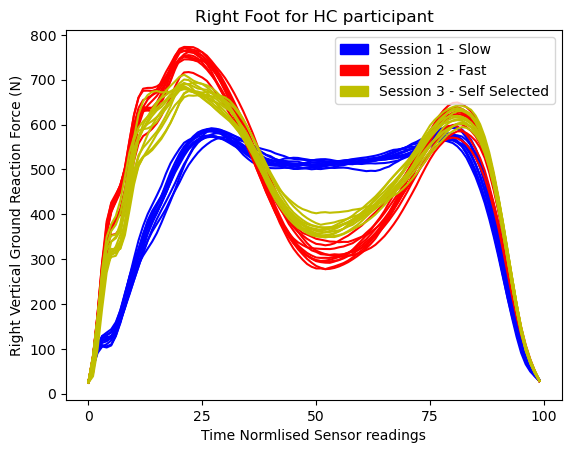

In [72]:
# Vertical GRF of 1 right foot strike
for i in range(0,len(p1)):
    p1.iloc[i].plot(color='b')
    session1 = mpatches.Patch(color='b', label='Session 1 - Slow')
for i in range(0,len(p2)):
    p2.iloc[i].plot(color='r')
    session2 = mpatches.Patch(color='r', label='Session 2 - Fast')
for i in range(0,len(p3)):
    p3.iloc[i].plot(color='y')
    session3 = mpatches.Patch(color='y', label='Session 3 - Self Selected')
plt.legend(loc="upper right",handles=[session1, session2, session3])
plt.title('Right Foot for HC participant')
plt.xlabel('Time Normlised Sensor readings')
plt.locator_params(axis="x", nbins=5)
plt.ylabel('Right Vertical Ground Reaction Force (N)')
plt.show()

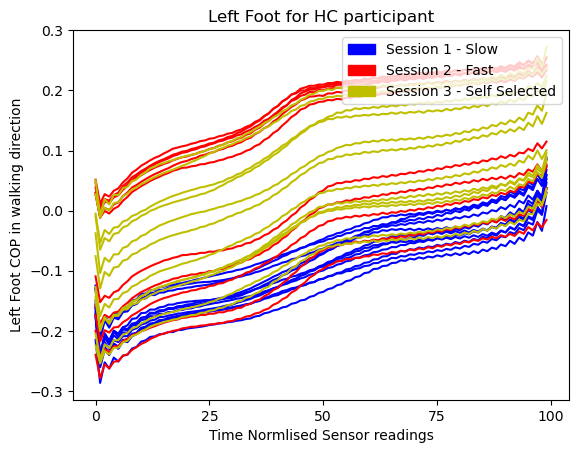

In [74]:
# Vertical GRF of 1 right foot strike
for i in range(0,len(q1)):
    q1.iloc[i].plot(color='b')
    session1 = mpatches.Patch(color='b', label='Session 1 - Slow')
for i in range(0,len(q2)):
    q2.iloc[i].plot(color='r')
    session2 = mpatches.Patch(color='r', label='Session 2 - Fast')
for i in range(0,len(q3)):
    q3.iloc[i].plot(color='y')
    session3 = mpatches.Patch(color='y', label='Session 3 - Self Selected')
plt.legend(loc="upper right",handles=[session1, session2, session3])
plt.title('Left Foot for HC participant')
plt.xlabel('Time Normlised Sensor readings')
plt.locator_params(axis="x", nbins=5)
plt.ylabel('Left Foot COP in walking direction')
plt.show()

In [42]:
# Merge with label
grf_v_right_pro.merge(participants_label, how='inner', on=['SUBJECT_ID','SESSION_ID']).isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

SHOE_SIZE            27353
HEIGHT               26992
AFFECTED_SIDE         7755
ORTHOPEDIC_INSOLE     5374
dtype: int64

In [55]:
demo = grf_v_right_pro.merge(participants_label, how='inner', on=['SUBJECT_ID','SESSION_ID'])
demo[[0,1,2,'BODY_WEIGHT']]

,0,1,2,BODY_WEIGHT
0,31.071726,114.495847,195.967700,1104.9
1,30.141182,101.553607,173.270700,1104.9
2,29.007648,101.596150,189.974615,1104.9
3,28.980951,100.996796,197.742664,1104.9
4,30.686851,113.854304,202.096194,1104.9
...,...,...,...,...
75727,2.345576,248.956296,514.356919,670.9
75728,12.226461,232.420063,469.860770,670.9
75729,6.363331,257.377621,481.269224,670.9
75730,12.637984,269.520946,512.962621,670.9


In [57]:
demo.loc[:, cols].div(demo['BODY_WEIGHT'], axis=0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.028122,0.103626,0.177362,0.213212,0.244907,0.307381,0.394742,0.475852,0.530934,0.561781,...,0.356424,0.304804,0.253109,0.205863,0.166508,0.133116,0.101114,0.071587,0.048150,0.027791
1,0.027280,0.091912,0.156820,0.188618,0.219912,0.275120,0.346994,0.422605,0.484483,0.526241,...,0.343966,0.295112,0.247654,0.202523,0.164523,0.132172,0.101644,0.073796,0.050401,0.028454
2,0.026254,0.091951,0.171938,0.208137,0.237737,0.289749,0.356841,0.426537,0.485674,0.525600,...,0.364212,0.311096,0.259801,0.209576,0.166770,0.132490,0.101969,0.073608,0.049563,0.028740
3,0.026229,0.091408,0.178969,0.242156,0.291759,0.360436,0.449683,0.527155,0.584698,0.624871,...,0.322434,0.267547,0.216327,0.169210,0.131078,0.104738,0.079441,0.056860,0.037370,0.025439
4,0.027773,0.103045,0.182909,0.223627,0.254670,0.308443,0.383850,0.462950,0.528609,0.573696,...,0.313639,0.264634,0.218138,0.178798,0.147592,0.116553,0.086890,0.059920,0.039636,0.025288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75727,0.003496,0.371078,0.766667,0.601995,0.640991,0.717061,0.814716,0.770479,0.760484,0.751018,...,0.562221,0.446222,0.318800,0.228772,0.143542,0.124865,0.089977,0.095170,0.047933,0.063510
75728,0.018224,0.346430,0.700344,0.602634,0.621910,0.634026,0.708425,0.740545,0.758890,0.761601,...,0.508084,0.403881,0.289463,0.204280,0.140730,0.116248,0.089979,0.085287,0.053836,0.056290
75729,0.009485,0.383630,0.717349,0.594954,0.636048,0.611803,0.684956,0.740351,0.775511,0.747425,...,0.723770,0.621370,0.487301,0.374642,0.243750,0.160103,0.083301,0.077111,0.034712,0.058697
75730,0.018837,0.401730,0.764589,0.674803,0.663504,0.683022,0.839049,0.888546,0.909281,0.898048,...,0.624734,0.512036,0.381857,0.272383,0.169078,0.118786,0.079143,0.077984,0.046193,0.056381


In [66]:
# Function to merge with labels and divide by body weight
def merge_normalise(df,df_label,column='BODY_WEIGHT'):
    '''
    df: left dataframe containing the sensor readings
    df_label: right dataframe containing the labels and metadata
    column: column to normalise on
    '''
    cols = list(range(0,100))
    df_merged = df.merge(df_label[['SUBJECT_ID','SESSION_ID',column]], how='inner', on=['SUBJECT_ID','SESSION_ID'])
    df_merged.loc[:, cols] = df_merged.loc[:, cols].div(df_merged[column], axis=0)
    return df_merged.drop(columns=[column])

In [76]:
%%time
grf_ap_left_n =  merge_normalise(grf_ap_left_pro,participants_label,'BODY_WEIGHT')
grf_ap_right_n = merge_normalise(grf_ap_right_pro,participants_label,'BODY_WEIGHT')
grf_ml_left_n =  merge_normalise(grf_ml_left_pro,participants_label,'BODY_WEIGHT')
grf_ml_right_n = merge_normalise(grf_ml_right_pro,participants_label,'BODY_WEIGHT')
grf_v_left_n =   merge_normalise(grf_v_left_pro,participants_label,'BODY_WEIGHT')
grf_v_right_n =  merge_normalise(grf_v_right_pro,participants_label,'BODY_WEIGHT')

CPU times: total: 1.03 s
Wall time: 1.79 s


<AxesSubplot:>

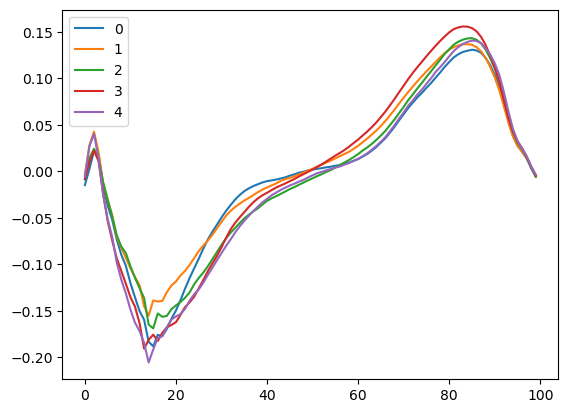

In [82]:
grf_ap_left_n[grf_ap_left_n.columns[3:]].head().transpose().plot()

<AxesSubplot:>

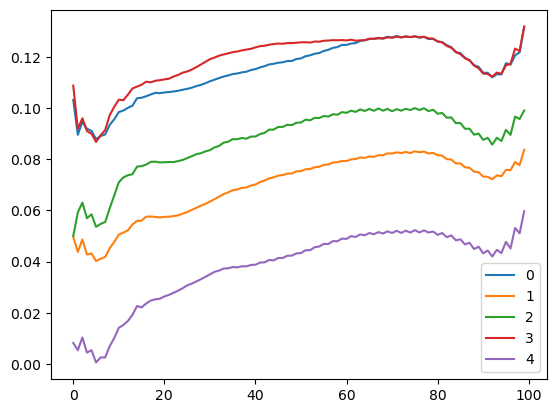

In [85]:
# COP no need to normalise
cop_ml_left_pro[cop_ml_left_pro.columns[3:]].head().transpose().plot()

In [87]:
#Save as CSV files
grf_ap_left_n.to_csv('../data/processed/grf_ap_left.csv', index=False)
grf_ap_right_n.to_csv('../data/processed/grf_ap_right.csv', index=False)
grf_ml_left_n.to_csv('../data/processed/grf_ml_left.csv', index=False)
grf_ml_right_n.to_csv('../data/processed/grf_ml_right.csv', index=False)
grf_v_left_n.to_csv('../data/processed/grf_v_left.csv', index=False)
grf_v_right_n.to_csv('../data/processed/grf_v_right.csv', index=False)
cop_ap_left_pro.to_csv('../data/processed/cop_ap_left.csv', index=False)
cop_ap_right_pro.to_csv('../data/processed/cop_ap_right.csv', index=False)
cop_ml_left_pro.to_csv('../data/processed/cop_ml_left.csv', index=False)
cop_ml_right_pro.to_csv('../data/processed/cop_ml_right.csv', index=False)